In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from Coeffs import *
import itertools
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

# Checking the $|\mathcal{M}|^2 \propto g_s^4 \, y_{DM}^2$ scaling with 1/m^2

Here we are going to multiply the masses for the same fatctor (example: 2,3...) and look how the cross scaction scales behave by this change. Notice that by doing this the mass ratio still contstant.

## $u\bar{u}\to t\bar{t}$

In [67]:
#data

uv_u_cs = [(1.861e-4,1.1e-6), (4.614e-5,1.9e-7), (1.165e-5,1.0e-7), (8.613e-6,3.0e-7)] #pb

eft_u_cs = [(1.848e-4,2.188e-7), (4.621e-5,3.0e-8), (1.155e-5,1.032e-8), (5.131e-6,5.495e-9)] #pb

m_psiT = np.array([5.0, 10.0, 20.0, 30.0])  #TeV

m_SDM = np.array([4.95, 9.9, 19.8, 29.7]) #TeV

factor = np.array([1/2, 1,2,3])

In [68]:
#Getting the points
pts_u_uv = []
err_u_uv = []
for i,cs in enumerate(uv_u_cs):
    pts_u_uv.append(cs[0])
    err_u_uv.append(np.sqrt(cs[1]**2/uv_u_cs[1][0] + cs[0]/(uv_u_cs[1][0]**2) * uv_u_cs[1][1]**2)) #Calculating the error for pts_u_uv/pts_u_uv[1]

pts_u_uv = np.array(pts_u_uv)
err_u_uv = np.array(err_u_uv)



In [69]:
#Getting the points
pts_u_eft = []
err_u_eft = []
for i,cs in enumerate(eft_u_cs):
    pts_u_eft.append(cs[0])
    err_u_eft.append(np.sqrt(cs[1]**2/eft_u_cs[1][0] + cs[0]/(eft_u_cs[1][0]**2) * eft_u_cs[1][1]**2)) #Calculating the error for pts_u_uv/pts_u_uv[1]

pts_u_eft = np.array(pts_u_eft)
err_u_eft = np.array(err_u_eft)

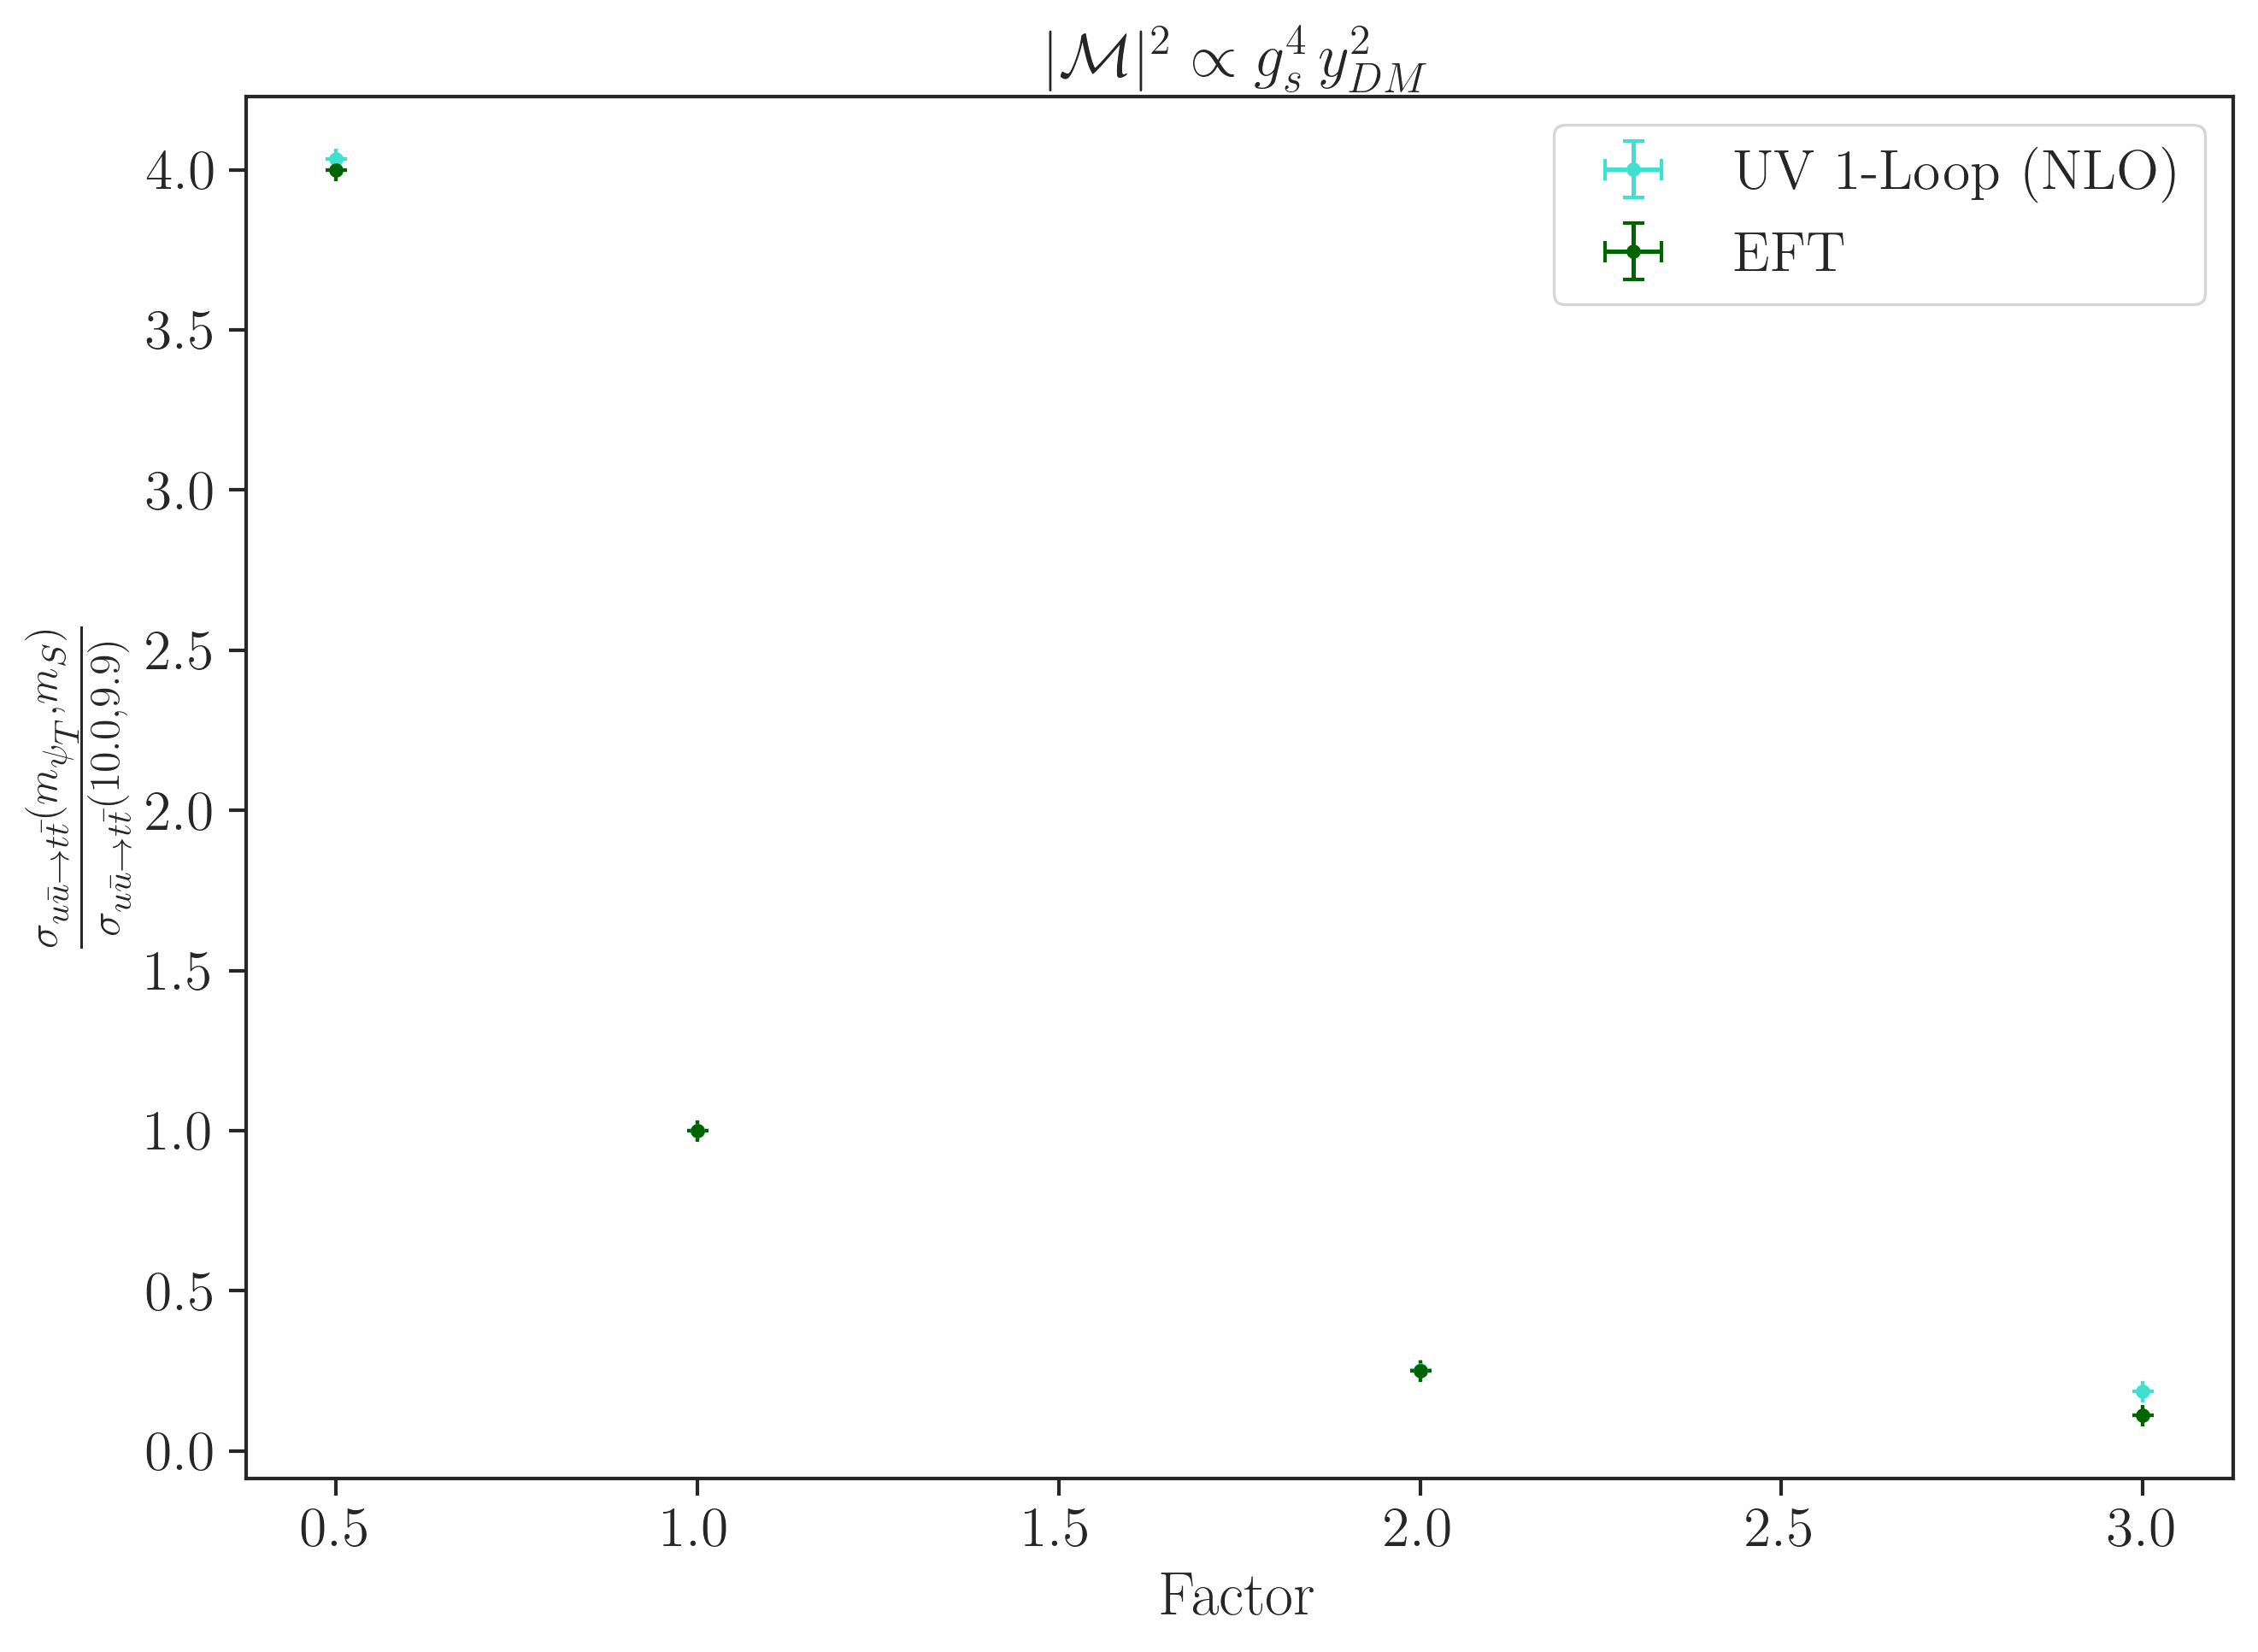

In [70]:
fig = plt.figure(figsize = [10,7], dpi = 300) 



plt.errorbar(factor,pts_u_uv/pts_u_uv[1],err_u_uv,0, 'o', ms = 3.0, capsize=3, 
                color = 'Turquoise', label = 'UV 1-Loop (NLO)' )

plt.errorbar(factor,pts_u_eft/pts_u_eft[1],err_u_eft,0, 'o', ms = 3.0, capsize=3, 
                color = 'Darkgreen', label = 'EFT' )

plt.ylabel(r'$\frac{\sigma_{u\bar{u}\to t\bar{t}}(m_{\psi_T},m_S)}{\sigma_{u\bar{u}\to t\bar{t}}(10.0, 9.9)}$ ')
plt.title(r'$|\mathcal{M}|^2 \propto g_s^4 \, y_{DM}^2$ ')
plt.xlabel(r'Factor')

plt.legend()
plt.show()

The last point are not behaving correctly beacuse we are close to the mass limit where the NLO starts to give wrong results

## $gg\to t \bar{t}$

In [71]:
#data

uv_g_cs = [(2.873e-3, 1.4e-5), (7.024e-4, 3.0e-6), (1.775e-4,8.5e-7), (9.762e-5,2.0e-6), 
           (8.983e-4,2.0e-6)] #pb

eft_g_cs = [(2.806e-3,3.808e-6), (6.99e-4,8.134e-7), (1.754e-4,2.12e-07), (4.374e-5, 5.901e-8), 
            (1.974e-5, 2.298e-8)] #pb

factorg = np.array([1/4, 1/2, 1,2,3])

In [72]:
#Getting the points
pts_g_uv = []
err_g_uv = []
for i,cs in enumerate(uv_g_cs):
    pts_g_uv.append(cs[0])
    err_g_uv.append(np.sqrt(cs[1]**2/uv_g_cs[1][0] + cs[0]/(uv_g_cs[1][0]**2) * uv_g_cs[1][1]**2)) #Calculating the error for pts_u_uv/pts_u_uv[1]

pts_g_uv = np.array(pts_g_uv)
err_g_uv = np.array(err_g_uv)

#Getting the points
pts_g_eft = []
err_g_eft = []
for i,cs in enumerate(eft_g_cs):
    pts_g_eft.append(cs[0])
    err_g_eft.append(np.sqrt(cs[1]**2/eft_g_cs[1][0] + cs[0]/(eft_g_cs[1][0]**2) * eft_g_cs[1][1]**2)) #Calculating the error for pts_u_uv/pts_u_uv[1]

pts_g_eft = np.array(pts_g_eft)
err_g_eft = np.array(err_g_eft)


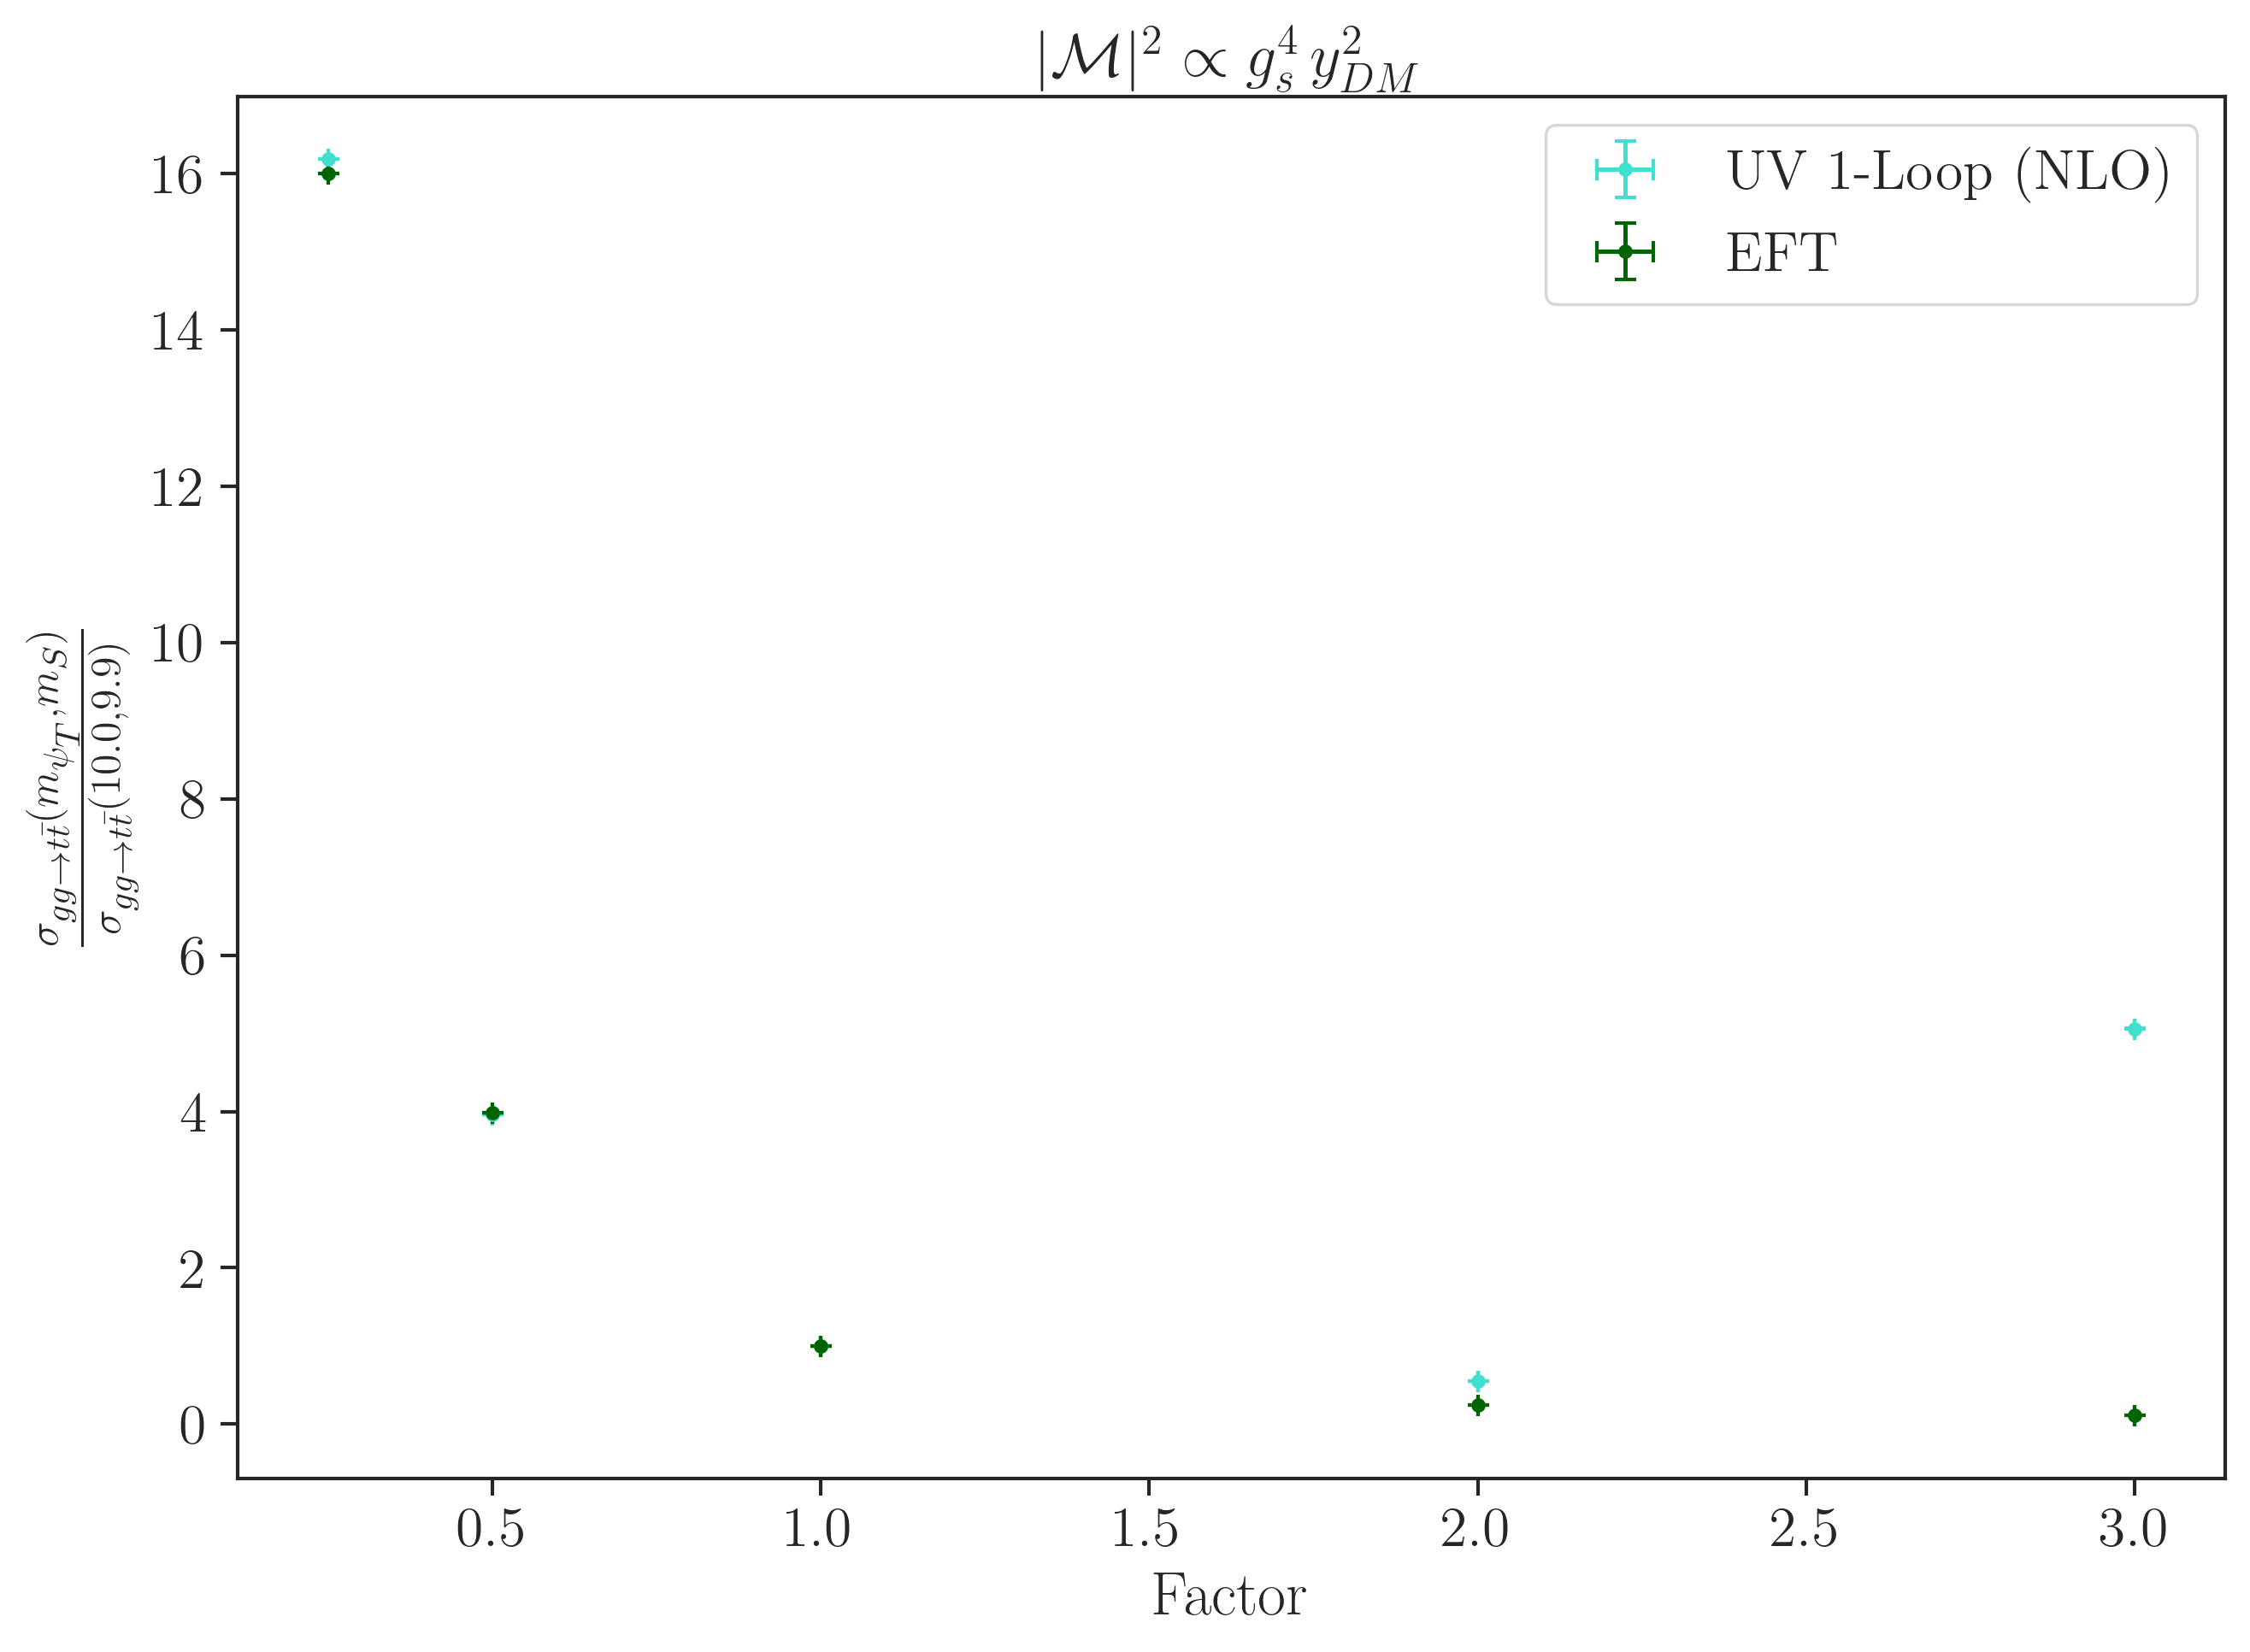

In [73]:
fig = plt.figure(figsize = [10,7], dpi = 300) 



plt.errorbar(factorg,pts_g_uv/pts_g_uv[2],err_g_uv,0, 'o', ms = 3.0, capsize=3, 
                color = 'Turquoise', label = 'UV 1-Loop (NLO)' )

plt.errorbar(factorg,pts_g_eft/pts_g_eft[2],err_g_eft,0, 'o', ms = 3.0, capsize=3, 
                color = 'Darkgreen', label = 'EFT' )

plt.ylabel(r'$\frac{\sigma_{gg\to t\bar{t}}(m_{\psi_T},m_S)}{\sigma_{gg\to t\bar{t}}(10.0, 9.9)}$ ')
plt.title(r'$|\mathcal{M}|^2 \propto g_s^4 \, y_{DM}^2$ ')
plt.xlabel(r'Factor')

plt.legend()
plt.show()

In the last two points we are in the limit where the cross section from the NLO calculations does not match the EFT.